In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
path = 'neural-approx-ss-lfi-main/results'

# Compile data

In [4]:
data = []

for problem in ["GC","OP"]:
    for metric in ["JSD","PREDEP"]:
        for method in ["SMC","SMC2","SNL","SNL2"]:
            data_numpy = np.load(f"{path}/{problem}/data/{metric}_{method}.npy")

            for round, values in enumerate(data_numpy):
                for value in values:
                    data.append({
                        "Problem": problem,
                        "Metric": metric,
                        "Method": method,
                        "Round": round + 1,
                        "Value": value
                    })

In [5]:
df = pd.DataFrame(data)

# Plot

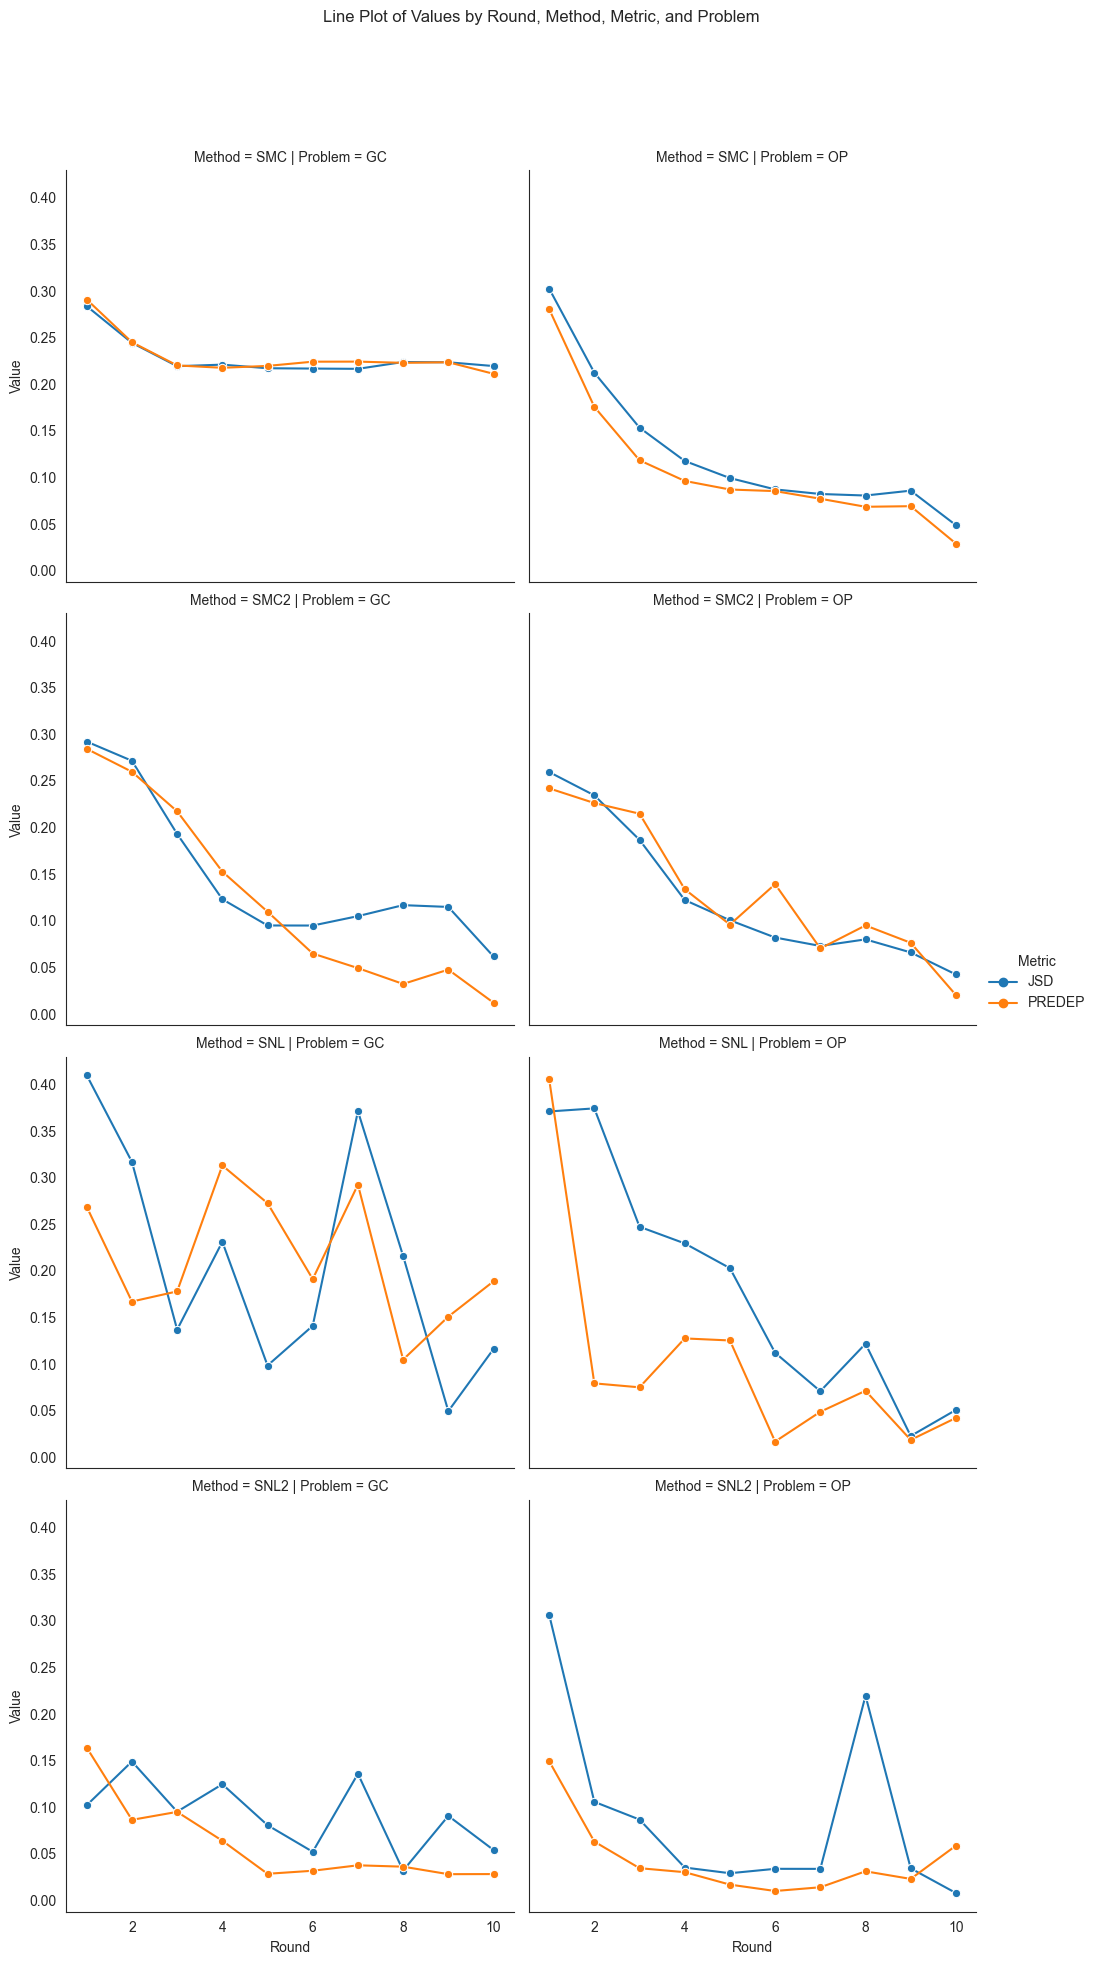

In [6]:
# Set style without gridlines
sns.set_style("white")

# Plot
g = sns.relplot(
    data=df,
    x="Round",
    y="Value",
    row="Method",
    col="Problem",
    hue="Metric",
    kind="line",
    marker="o"
)
g.set_axis_labels("Round", "Value")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Line Plot of Values by Round, Method, Metric, and Problem")
plt.show()

# Table

<Figure size 1000x600 with 0 Axes>

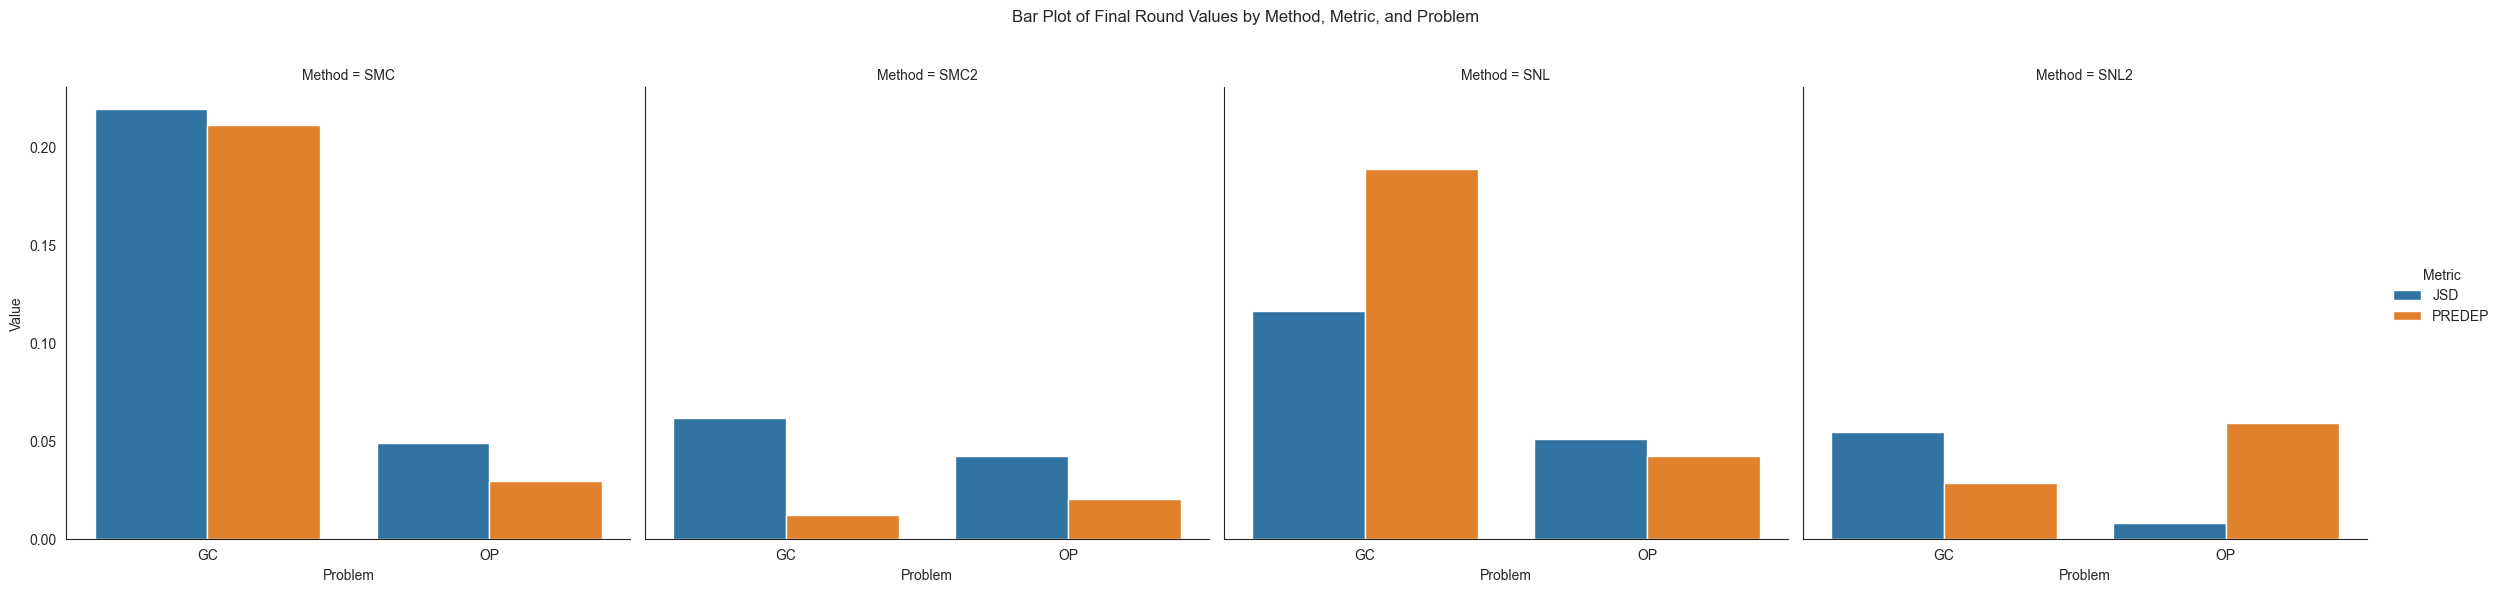

In [12]:
df_last = df[df['Round'] == df['Round'].max()]

plt.figure(figsize=(10, 6))
sns.catplot(
    data=df_last,
    x="Problem",
    y="Value",
    hue="Metric",
    col="Method",
    kind="bar",
    height=6,
    aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle("Bar Plot of Final Round Values by Method, Metric, and Problem")
plt.show()